In [ ]:
# Connect to the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import library
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import GRU
from keras.layers import Bidirectional
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
from keras import optimizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from numpy import savetxt

In [ ]:
# Upload file
from google.colab import files
uploaded = files.upload()

Saving Wanshouxigong.csv to Wanshouxigong.csv


In [ ]:
data=read_csv("Wanshouxigong.csv")
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2


In [ ]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('Wanshouxigong.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])

In [ ]:
dataset.drop("No", axis=1, inplace=True)

In [ ]:
dataset=dataset.fillna(method="pad")
dataset

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
year_month_day_hour,,,,,,,,,,,,
2013-03-01 00:00:00,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0
2013-03-01 01:00:00,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4
2013-03-01 02:00:00,8.0,8.0,7.0,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7
2013-03-01 03:00:00,8.0,8.0,3.0,16.0,200.0,59.0,-0.7,1023.5,-20.9,0.0,NW,2.6
2013-03-01 04:00:00,8.0,8.0,3.0,16.0,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4
2017-02-28 20:00:00,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9
2017-02-28 21:00:00,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1


In [ ]:
dataset.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
temp_cols=dataset.columns.tolist()
index=dataset.columns.get_loc("NO2")
new_cols=temp_cols[index:index+1] + temp_cols[0:index] + temp_cols[index+1:]
dataset=dataset[new_cols]

In [ ]:
dataset

,NO2,PM2.5,PM10,SO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
year_month_day_hour,,,,,,,,,,,,
2013-03-01 00:00:00,17.0,9.0,9.0,6.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0
2013-03-01 01:00:00,14.0,11.0,11.0,7.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4
2013-03-01 02:00:00,16.0,8.0,8.0,7.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7
2013-03-01 03:00:00,16.0,8.0,8.0,3.0,200.0,59.0,-0.7,1023.5,-20.9,0.0,NW,2.6
2013-03-01 04:00:00,16.0,8.0,8.0,3.0,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,24.0,11.0,32.0,3.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4
2017-02-28 20:00:00,41.0,13.0,32.0,3.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9
2017-02-28 21:00:00,38.0,14.0,28.0,4.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = dataset.values
encoder = LabelEncoder()
values[:,10] = encoder.fit_transform(values[:,10])
values = values.astype('float32')
values[:,10]

array([14., 14., 14., ...,  7.,  6.,  5.], dtype=float32)

In [ ]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [ ]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 24
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [ ]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (35040, 1)
X (35040, 24, 12)


In [ ]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (26280, 24, 12)
X_test (8760, 24, 12)
Y_train (26280, 1)
Y_test (8760, 1)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
print(X_train.shape)
print(X_test.shape)

(26280, 24, 12, 1)
(8760, 24, 12, 1)


In [ ]:
#CNN+GRU model building process
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5, activation='relu'), input_shape=(None, X_train.shape[2], X_train.shape[3])))

model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

model.add(GRU(50, activation='relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(GRU(units = 50,activation='relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(GRU(units = 50, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size = 64, verbose=1)

Epoch 1/100
411/411 [==============================] - 59s 127ms/step - loss: 0.0068 - val_loss: 0.0034
Epoch 2/100
411/411 [==============================] - 48s 116ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 3/100
411/411 [==============================] - 47s 114ms/step - loss: 0.0026 - val_loss: 0.0040
Epoch 4/100
411/411 [==============================] - 48s 117ms/step - loss: 0.0024 - val_loss: 0.0043
Epoch 5/100
411/411 [==============================] - 46s 112ms/step - loss: 0.0024 - val_loss: 0.0054
Epoch 6/100
411/411 [==============================] - 50s 123ms/step - loss: 0.0023 - val_loss: 0.0040
Epoch 7/100
411/411 [==============================] - 49s 120ms/step - loss: 0.0023 - val_loss: 0.0052
Epoch 8/100
411/411 [==============================] - 46s 112ms/step - loss: 0.0022 - val_loss: 0.0050
Epoch 9/100
411/411 [==============================] - 47s 113ms/step - loss: 0.0022 - val_loss: 0.0040
Epoch 10/100
411/411 [==============================] - 48s 117m

In [ ]:
from keras.models import load_model
model.save('AirPollutionCNNGRU.h5')

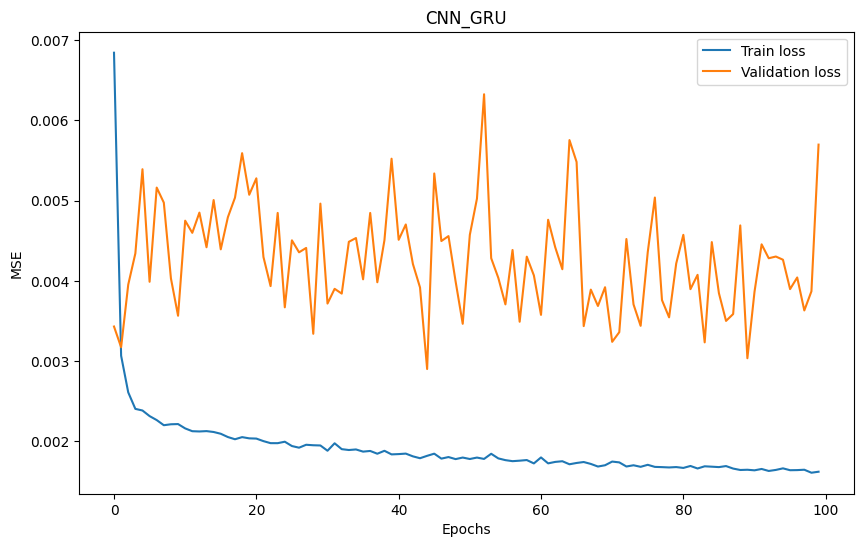

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("CNN_GRU")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()
plt.savefig('graph.png')

In [ ]:
RMSE1=[]
RMAE1=[]
MAPE1=[]
R22=[]

for i in range(40, 181, 5):
  Y_pred = model.predict(X_test[:i,:])
  #print(Y_pred)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:i,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  Y_predicted = scaler.inverse_transform(Y_predicted)
  Y_tested = scaler.inverse_transform(Y_tested)
  Y_predicted = Y_predicted[:,0:1]
  Y_tested = Y_tested[:i,0:1]
  mse = mean_squared_error(Y_tested, Y_predicted)
  rmse = np.sqrt(mse)
  print("RMSE at %s = %s" % (i, rmse))
  RMSE1=np.append(RMSE1,rmse)
  mae = mean_absolute_error(Y_tested, Y_predicted)
  rmae = np.sqrt(mae)
  RMAE1=np.append(RMAE1,rmae)
  print("RMAE at %s = %s" % (i, rmae))
  mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
  print("MAPE at %s = %s" % (i, mape))
  MAPE1=np.append(MAPE1,mape)
  #R2 score
  R2 = r2_score( Y_predicted, Y_tested)
  print("R2 at %s = %s" % (i, R2))
  R22=np.append(R22,R2)

2/2 [==============================] - 3s 27ms/step
RMSE at 40 = 17.2488
RMAE at 40 = 3.8187249
MAPE at 40 = 0.22778627
R2 at 40 = -0.07848480583298434
2/2 [==============================] - 0s 29ms/step
RMSE at 45 = 18.650736
RMAE at 45 = 3.9522285
MAPE at 45 = 0.23120321
R2 at 45 = -0.12599021662422283
2/2 [==============================] - 0s 22ms/step
RMSE at 50 = 18.464441
RMAE at 50 = 3.94824
MAPE at 50 = 0.22681111
R2 at 50 = -0.1170186351008764
2/2 [==============================] - 0s 20ms/step
RMSE at 55 = 18.411575
RMAE at 55 = 3.948298
MAPE at 55 = 0.26199427
R2 at 55 = -0.0228860746993218
2/2 [==============================] - 0s 29ms/step
RMSE at 60 = 17.874031
RMAE at 60 = 3.8707569
MAPE at 60 = 0.25529006
R2 at 60 = 0.06504387384939248
3/3 [==============================] - 0s 19ms/step
RMSE at 65 = 17.18763
RMAE at 65 = 3.7409246
MAPE at 65 = 0.24373166
R2 at 65 = 0.21771262508417832
3/3 [==============================] - 0s 33ms/step
RMSE at 70 = 16.983261
RMAE at 70 

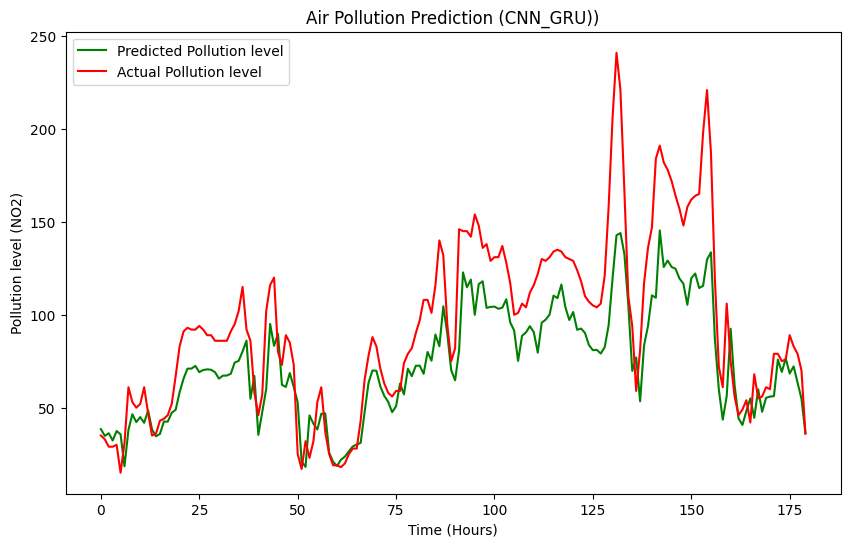

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted, color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (CNN_GRU))")
plt.xlabel("Time (Hours)")
plt.ylabel("Pollution level (NO2)")
plt.legend()
plt.show()
plt.savefig('graphCNNGRU.png')

In [ ]:
savetxt('Predict_CNN_GRU_NO2.csv', Y_predicted, delimiter=',')

In [ ]:
savetxt('Test_CNN_GRU_NO2.csv', Y_tested, delimiter=',')